In [1]:
import pandas as pd

**Leitura do arquivo csv que está na pasta**

In [2]:
df = pd.read_csv("oecd_pisa.csv")

**Análise das 10 primeiras linhas**

In [3]:
df.head(10)

,index,LOCATION,INDICATOR,SUBJECT,TIME,Value
0,0,AUS,PISAMATH,BOY,2003,527.000
1,1,AUS,PISAMATH,BOY,2006,527.000
2,2,AUS,PISAMATH,BOY,2009,519.000
3,3,AUS,PISAMATH,BOY,2012,510.115
4,4,AUS,PISAMATH,BOY,2015,497.000
5,5,AUS,PISAMATH,BOY,2018,494.000
6,6,AUS,PISAMATH,GIRL,2003,522.000
7,7,AUS,PISAMATH,GIRL,2006,513.000
8,8,AUS,PISAMATH,GIRL,2009,509.000
9,9,AUS,PISAMATH,GIRL,2012,497.821


**Tipos de variavéis**

In [4]:
df.dtypes

index          int64
LOCATION      object
INDICATOR     object
SUBJECT       object
TIME           int64
Value        float64
dtype: object

In [5]:
df.shape

(2087, 6)

**Análise do final da tabela**

In [6]:
df.tail()

,index,LOCATION,INDICATOR,SUBJECT,TIME,Value
2082,2082,CRI,PISASCIENCE,BOY,2018,420.0
2083,2083,CRI,PISASCIENCE,GIRL,2018,411.0
2084,2084,LTU,PISASCIENCE,TOT,2018,482.0
2085,2085,LTU,PISASCIENCE,BOY,2018,479.0
2086,2086,LTU,PISASCIENCE,GIRL,2018,485.0


In [7]:
df.describe()

,index,TIME,Value
count,2087.000000,2087.000000,2087.000000
mean,1043.000000,2010.814087,487.644684
std,602.609326,5.317975,38.644532
min,0.000000,2000.000000,348.000000
25%,521.500000,2006.000000,475.000000
50%,1043.000000,2012.000000,495.000000
75%,1564.500000,2015.000000,512.000000
max,2086.000000,2018.000000,574.000000


**Nome das colunas**

In [8]:
df.columns

Index(['index', 'LOCATION', 'INDICATOR', 'SUBJECT', 'TIME', 'Value'], dtype='object')

In [9]:
df.drop("index", axis=1, inplace=True)

In [10]:
df.columns

Index(['LOCATION', 'INDICATOR', 'SUBJECT', 'TIME', 'Value'], dtype='object')

In [11]:
df["Value"].count()

2087

**Modo ordenado dos anos (TIME)**

In [12]:
df["TIME"].sort_values().unique()

array([2000, 2003, 2006, 2009, 2012, 2015, 2018], dtype=int64)

In [13]:
len(df["LOCATION"].unique())

47

In [14]:
df["Max"] = df["Value"].max()
df.head()

,LOCATION,INDICATOR,SUBJECT,TIME,Value,Max
0,AUS,PISAMATH,BOY,2003,527.000,574.0
1,AUS,PISAMATH,BOY,2006,527.000,574.0
2,AUS,PISAMATH,BOY,2009,519.000,574.0
3,AUS,PISAMATH,BOY,2012,510.115,574.0
4,AUS,PISAMATH,BOY,2015,497.000,574.0


In [15]:
df_agrupado = df.groupby("TIME").mean(["Value"]).reset_index()

**Análise do país Brasil**

In [16]:
df[(df["TIME"] == 2000) & (df["LOCATION"] == "BRA")]

,LOCATION,INDICATOR,SUBJECT,TIME,Value,Max
1104,BRA,PISAREAD,BOY,2000,388.0,574.0
1111,BRA,PISAREAD,GIRL,2000,404.0,574.0
1407,BRA,PISAREAD,TOT,2000,396.0,574.0


In [17]:
for index, row in df_agrupado.iterrows():
  df_agrupado["Max"][index] = df[df["TIME"] == row["TIME"]]["Value"].max()

C:\Users\danie\AppData\Local\Temp\ipykernel_9108\3687700544.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_agrupado["Max"][index] = df[df["TIME"] == row["TIME"]]["Value"].max()
C:\Users\danie\AppData\Local\Temp\ipykernel_9108\3687700

**Valores da média e Máxima, conforme o ano**

In [18]:
df_agrupado.head()

,TIME,Value,Max
0,2000,486.172421,571.000
1,2003,488.070030,565.000
2,2006,487.911910,574.000
3,2009,490.564704,563.000
4,2012,491.332012,562.114


**Gráfico de linha para análise visual**

<Axes: xlabel='TIME'>

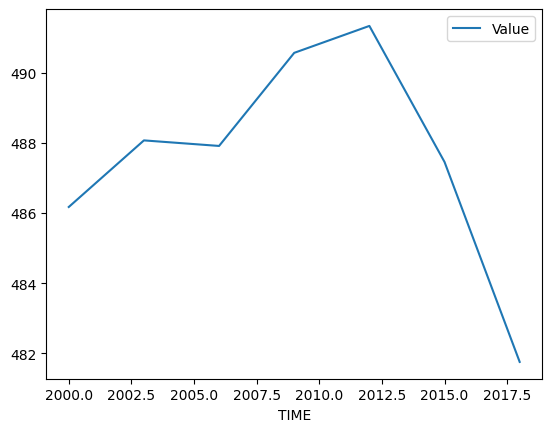

In [19]:
df_agrupado.plot(x="TIME", y="Value", kind="line")